# ZOMBIE

## Oppgave 1 

Modellen din kan inneholde mange ulike faktorer, og du står fritt
til å legge til flere, dersom du begrunner det. Legg til ´en og ´en
faktor, og test modellen etter hver gang. Kommenter populasjonsutviklinga etter hver nye faktor er lagt til.

1. Lag først et program der menneskene er trygge mot zombier,
og der nye mennesker kan komme til ved fødsel og (mer
sannsynlig) innvandring. Lag gjerne ett ledd i likninga som
inkluderer begge disse faktorene.

2. Legg inn en ressursbegrensning (bæreevne) for populasjonen. Hvilke faktorer påvirker denne?

3. Menneskene kan også dø av sykdom, skade og alderdom
(naturlig død). Legg dette inn i modellen, og tenk på hvor
sannsynlig dette er (hvor god er tilgangen på medisiner, lege
o.l.?).

4. Nå skal du legge inn en zombiepopulasjon som lever i nærheten av Alexandria. Du kan selv bestemme hvor mange
zombier som finnes og hvor sannsynlig det er at mennesker
blir drept av en zombie. Zombiene fungerer som rovdyr, slik
at menneskene ikke blir til zombier i denne modellen.

5. Nå kan du legge inn muligheten for at mennesker blir til
zombier hvis de blir bitt, men ikke revet i fillebiter. Det vil
si at noen mennesker vil bli smitta, mens andre vil bli drept
av zombiene. De som blir smitta, blir til zombier, og dermed
øker zombiepopulasjonen.

6. Alexandria kan slå tilbake mot zombiene. Legg inn en faktor
som bidrar til at menneskene kan ta livet av zombier.

7. I nærheten av Alexandria finner vi landsbyene Hilltop og
Kingdom. Fra disse kan det komme forsterkninger til Alexandria ved behov. Inkluder dette i modellen din.

### Oppgave 1

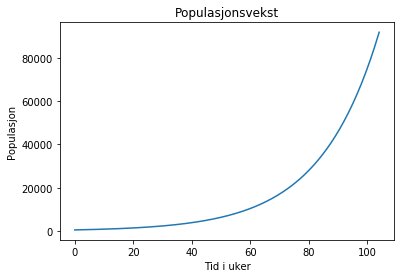

In [65]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
rate = 0.05     #Reproduksjonsrate 
innvandring = 2

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m

#Eulers metode
for i in range(N):
    pder = rate * m_p[i] + innvandring 
    m_p[i+1] = m_p[i] + pder * dt
    t[i+1] = t[i] + dt

plot(t,m_p)
title('Populasjonsvekst')
xlabel('Tid i uker')
ylabel('Populasjon')
show()


### Kommentar 
Dette er et lite paradis-land hvor ingen dør på et år og alle lever lykkelig alle sine dager i løpet av to år. Ingen dør av sykdom, zombie, sult, tørste eller hverandre. :)  

## Oppgave 2

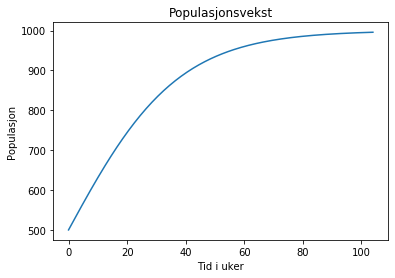

In [66]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
rate = 0.05     #Reproduksjonsrate 
innvandring = 2  #randint(0,7)
b = 1000 

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b)
    m_p[i+1] = m_p[i] + pder[i] * dt
    t[i+1] = t[i] + dt

plot(t,m_p)
title('Populasjonsvekst')
xlabel('Tid i uker')
ylabel('Populasjon')
show()


### Kommentar 
Her har vi bæreevnen satt på 1000 mennesker.Vi ser at mange ikke får komme inn til paradis-landet så de 1000 som er der får overleve. Her dør folk av manger på mat, vann og plass. Men ingen dør av zombier, sykdom eller hverandre. 

## Oppgave 3

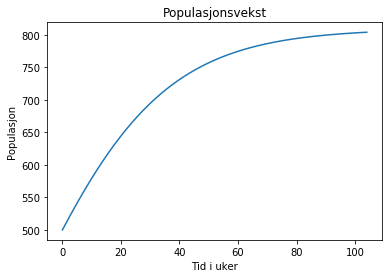

In [72]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
rate = 0.05     #Reproduksjonsrate 
innvandring = 2  #randint(0,7)
b = 1000 
syk_rate = 0.1
dødsrate = 0.1 * syk_rate

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i]
    m_p[i+1] = m_p[i] + pder[i] * dt
    t[i+1] = t[i] + dt

plot(t,m_p)
title('Populasjonsvekst')
xlabel('Tid i uker')
ylabel('Populasjon')
show()


### Kommentar 
Siden dødsraten er en funksjon av det totale anntall mennesker, vil bæreevnen synke ned til 1000 - dødsraten*1000 

## Oppgave 4

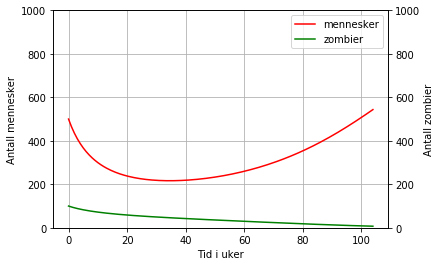

In [114]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
start_z = 100
rate = 0.05   #Reproduksjonsrate 
innvandring = 2  #randint(0,7)
b = 1000 
syk_rate = 0.1
dødsrate = 0.01 * syk_rate
møterate = 0.0001 
ned_z = 0.006

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)
Z = zeros(N+1)
zder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m
Z[0] = start_z

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i]* Z[i]
    zder[i] = møterate*  m_p[i] * Z[i] - ned_z * Z[i] 
    m_p[i+1] = m_p[i] + pder[i] * dt
    Z[i + 1] = Z[i] - zder[i]* dt
    t[i+1] = t[i] + dt

#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, Z, '-g', label = 'zombier')

data = data1 + data2 
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax2.set_ylabel ("Antall zombier")
ax2.set_ylim(0,1000)
ax.set_ylim(0,1000)
plt.show()



### Kommentar 
Vi startet med 100 zombier, men siden menensker ikke kan bli zombier og zombier ikke kan reprodusere, dør zombiepopulasjonen ut ganse så raskt fordi mennesker er mordere. 
## Oppgave 5